In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from tqdm.contrib.itertools import product

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

### a. Plot isocontours

In [3]:
def f_u1(w: np.ndarray):
    w1, w2 = w[0], w[1]
    return np.exp(-np.square(w1) - 2 * np.square(w2 - 1))

def f_u2(w: np.ndarray):
    w1, w2 = w[0], w[1]
    return np.exp(-np.square(w1 - 1) - 2 * np.square(w2))

In [4]:
def f(w: np.ndarray):
    return f_u1(w) + f_u2(w)

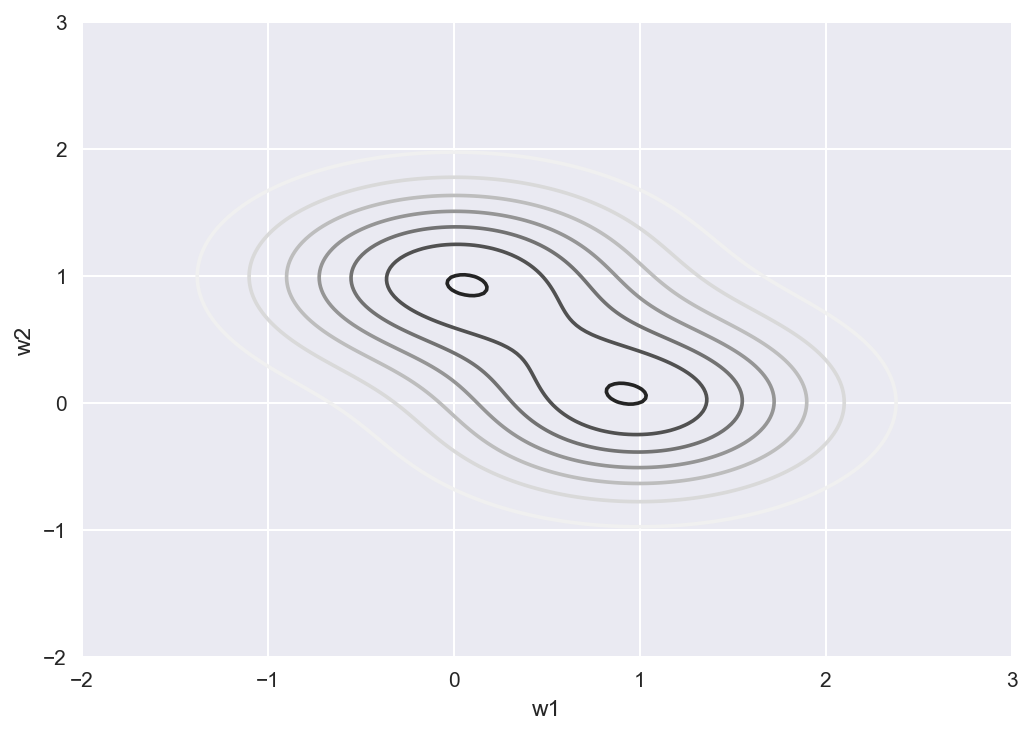

In [5]:
vecf = np.vectorize(f,signature="(n)->()")
w1 = np.linspace(-2.0,3.0,200)
w2 = np.linspace(-2.0,3.0,200)
W1,W2 = np.meshgrid(w1,w2)
Fs = vecf(np.stack((W1,W2),axis=2))
plt.figure(dpi=150)
plt.contour(W1,W2,Fs)
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

### b. Calculate gradient

please check the attached PDF file

### c. Use SGD

NOTE: I use the stopping criterion as norm(gradient) <= EPS

In [6]:
def gradient(w: np.ndarray):
    w1, w2 = w[0], w[1]
    u1, u2 = f_u1(w), f_u2(w)

    return np.array([
        -2 * w1 * u1 - 2 * (w1 - 1) * u2,
        -2 * (w2 - 1) * u1 - 4 * w2 * u2
    ])

def update(w: np.ndarray, lr: float):
    w_updated = w + lr * gradient(w)

    return w_updated 

In [7]:
EPS = 1e-4

In [8]:
dict_w_init = {
    'w0_1': np.array([0.2, 0.5]),
    'w0_2': np.array([0.5, 0.2]),
    'w0_3': np.array([1.0, 1.0]),
}

list_lr = [5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-4]

In [9]:
results = {
    'w0_1': defaultdict(list),
    'w0_2': defaultdict(list),
    'w0_3': defaultdict(list),
}

for tup_w_init, lr in product(dict_w_init.items(), list_lr):
    w_init_name, w_init = tup_w_init
    w = w_init

    while True:
        # Run the update
        w_updated = update(w, lr)

        # Check stopping criterion
        # if np.abs(f(w_updated) - f(w)) <= EPS:
        if np.linalg.norm(gradient(w_updated)) <= EPS:
            break

        # Update and backup weight
        w = w_updated
        results[w_init_name][lr].append(w)

  0%|          | 0/18 [00:00<?, ?it/s]

In [10]:
best = {}

for w_init_name, records in results.items():
    best_lr = 0
    best_f_val = -10e10

    for lr, ws in records.items():
        w_last = ws[-1]

        if f(w_last) > best_f_val:
            best_f_val = f(w_last)
            best_lr = lr

    best[w_init_name] = best_lr    

In [11]:
best

{'w0_1': 0.1, 'w0_2': 0.05, 'w0_3': 0.5}

### d. Plot trajectories

In [12]:
def draw_contour(ax):
    vecf = np.vectorize(f, signature="(n)->()")
    w1 = np.linspace(-2.0,3.0,200)
    w2 = np.linspace(-2.0,3.0,200)
    W1, W2 = np.meshgrid(w1, w2)
    Fs = vecf(np.stack((W1, W2),axis=2))
    
    ax.contour(W1,W2,Fs)
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")


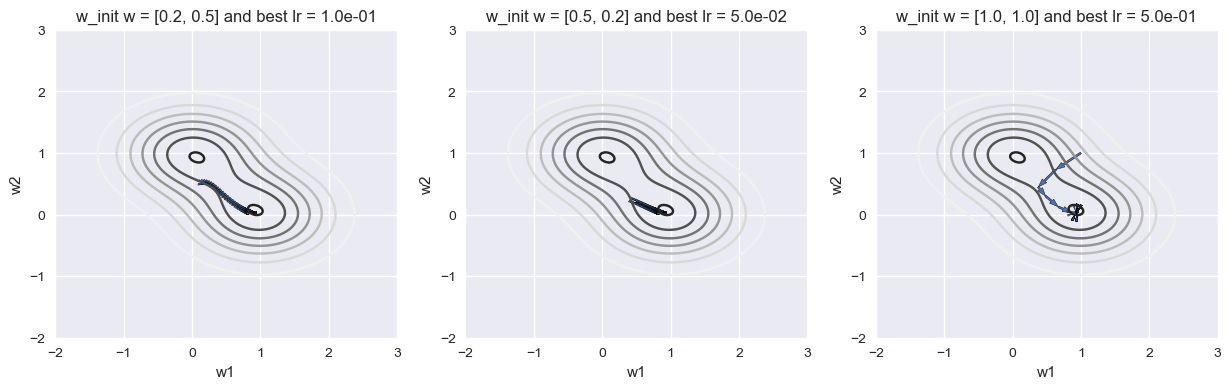

In [13]:
fig = plt.figure(figsize=(15, 4))

for i, (w_init_name, best_lr) in enumerate(best.items()):
    ax = fig.add_subplot(1, 3, i + 1)

    # Draw contour
    draw_contour(ax)

    # Draw trajectories
    ws = results[w_init_name][best_lr]
    w_prev = dict_w_init[w_init_name]

    for w in ws:
        x_prev, y_prev = w_prev
        dx, dy = w - w_prev
        ax.arrow(x_prev, y_prev, dx, dy, length_includes_head=True, width=0.03)

        w_prev = w

    ax.set_title(f"w_init w = {dict_w_init[w_init_name].tolist()} and best lr = {best_lr:.1e}")

#### e. Plot objective function

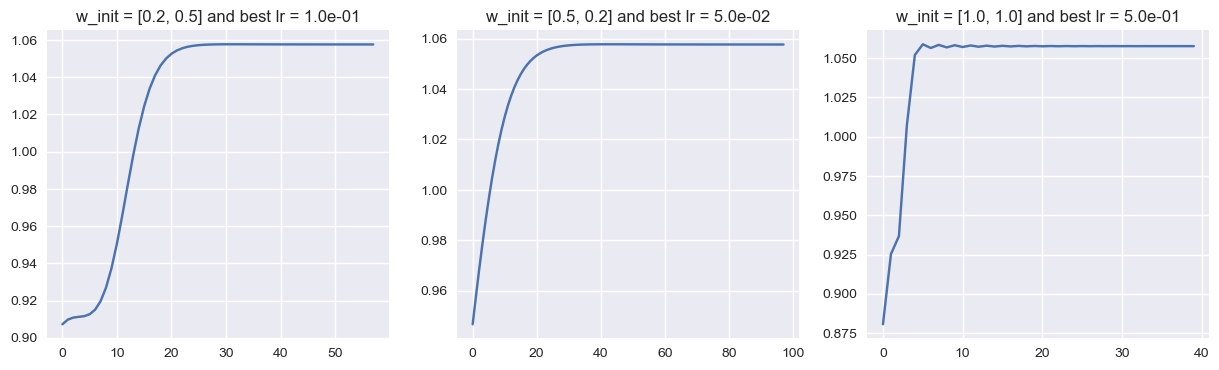

In [14]:
fig = plt.figure(figsize=(15, 4))

for i, (w_init_name, best_lr) in enumerate(best.items()):
    ax = fig.add_subplot(1, 3, i + 1)

    f_vals = [f(w) for w in results[w_init_name][best_lr]]

    ax.plot(f_vals)

    ax.set_title(f"w_init = {dict_w_init[w_init_name].tolist()} and best lr = {best_lr:.1e}")